# We will be using Kmeans for customer segmentation using RFM values for each Customer
# It's very intresting let's check it out

In [105]:
#importing all the necessary packages and loading the dataset
import pandas as pd
import numpy as np
data1=pd.read_csv('../Online Retail.csv',encoding='unicode_escape')
data1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [106]:
df1=data1.copy()

# we will find number of unique countries and then consider one main country with highest customer

In [107]:
df1.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [108]:
customer_country=df1[['Country','CustomerID']].drop_duplicates()

customer_country.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID', ascending=False)

,Country,CustomerID
36,United Kingdom,3950
14,Germany,95
13,France,87
31,Spain,31
3,Belgium,25
33,Switzerland,21
27,Portugal,19
19,Italy,15
12,Finland,12
1,Austria,11


In [109]:
#As we can see most customer are from 'United Kingdom' so we will drop all other countries.
#Countries are dropped because different countries have behaviour towards shopping

In [110]:
df1 = df1.loc[df1['Country'] == 'United Kingdom']

In [111]:
df1.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133600
Country             0
dtype: int64

In [115]:
df1 = df1.dropna()
df1.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [121]:
#Checking for -ve values and removing them

In [122]:
df1.UnitPrice.min()

0.0

In [123]:
df1.Quantity.min()

-80995

In [124]:
df1 = df1[(df1['Quantity']>0)]
df1.Quantity.min()

1

In [125]:
#Finding unique values for each columns

In [126]:
def unique_counts(df1):
   for i in df1.columns:
       count = df1[i].nunique()
       print(i, ": ", count)
unique_counts(df1)

InvoiceNo :  16649
StockCode :  3645
Description :  3844
Quantity :  294
InvoiceDate :  15615
UnitPrice :  403
CustomerID :  3921
Country :  1


In [127]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [128]:
#Adding total price as one column
df1['TotalPrice'] = df1['Quantity'] * df1['UnitPrice']
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [131]:
#dates are in mm/dd/YY
df1['InvoiceDate'].min()

'1/10/2011 10:32'

In [132]:
df1['InvoiceDate'].max()

'9/9/2011 9:52'

In [133]:
import datetime as dt
NOW = dt.datetime(2011,12,10)

In [134]:
#changing 'InvoiceDate' into pandas datetime
df1['InvoiceDate'] = pd.to_datetime(df1['InvoiceDate'])

In [ ]:
#Now we will add 3 new columns for Recency,Frequency,Monetary value

# Recency=How recently has the customer bought something.The Lesser its value the good is the customer for us
# Frequency=How frequent is the customer using our retail shop.The more its value the good for us
# Monetary value=How much money has the customer spend in our shop

In [135]:
rfmTable = df1.groupby('CustomerID').agg({'InvoiceDate': lambda x: (NOW - x.max()).days, # Recency
                                        'InvoiceNo': lambda x: len(x),      # Frequency
                                        'TotalPrice': lambda x: x.sum()}) # Monetary Value

rfmTable['InvoiceDate'] = rfmTable['InvoiceDate'].astype(int)
rfmTable.rename(columns={'InvoiceDate': 'recency', 
                         'InvoiceNo': 'frequency', 
                         'TotalPrice': 'monetary_value'}, inplace=True)

In [136]:
rfmTable.head()

,recency,frequency,monetary_value
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4596,33719.73
12749.0,3,199,4090.88
12820.0,3,59,942.34


In [137]:
first_customer = df1[df1['CustomerID']== 12346.0]
first_customer

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.6


In [139]:
(NOW - dt.datetime(2011,1,18)).days==326

True

In [152]:
#finding quantile so that we can get minimum of recency and max of frequency and monetary_value
quantiles = rfmTable.quantile(q=[0.25,0.5,0.75])
quantiles

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile
0.25,17.0,17.0,300.04,1.0,2.0,2.0
0.50,50.0,41.0,651.82,2.0,3.0,3.0
0.75,142.0,99.0,1575.89,3.0,4.0,4.0


In [153]:
# Let us keep quantiles value of those 3 columns into dictionary
quantiles = quantiles.to_dict()
quantiles

{'recency': {0.25: 17.0, 0.5: 50.0, 0.75: 142.0},
 'frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 99.0},
 'monetary_value': {0.25: 300.03999999999996,
  0.5: 651.8199999999999,
  0.75: 1575.89},
 'r_quartile': {0.25: 1.0, 0.5: 2.0, 0.75: 3.0},
 'f_quartile': {0.25: 2.0, 0.5: 3.0, 0.75: 4.0},
 'm_quartile': {0.25: 2.0, 0.5: 3.0, 0.75: 4.0}}

In [154]:
segmented_rfm = rfmTable

# We have created a function for recency,frequency and monetary money that would return 1,2,3,4 by using quantiles.
# Eg:If recency is less it would return 1,if frequency is more it would return 4,if Monetary money is more it would return 1.
# Our best suited customer would be '111'. Think!!

In [158]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [159]:
segmented_rfm['r_quartile'] = segmented_rfm['recency'].apply(RScore, args=('recency',quantiles,))
segmented_rfm['f_quartile'] = segmented_rfm['frequency'].apply(FMScore, args=('frequency',quantiles,))
segmented_rfm['m_quartile'] = segmented_rfm['monetary_value'].apply(FMScore, args=('monetary_value',quantiles,))

In [160]:
segmented_rfm.head()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
CustomerID,,,,,,,
12346.0,325,1,77183.60,4,4,1,441
12747.0,2,103,4196.01,1,1,1,111
12748.0,0,4596,33719.73,1,1,1,111
12749.0,3,199,4090.88,1,1,1,111
12820.0,3,59,942.34,1,2,2,122


In [162]:
#converting everything as str
segmented_rfm['RFMScore'] = segmented_rfm.r_quartile.map(str) \
                            + segmented_rfm.f_quartile.map(str) \
                            + segmented_rfm.m_quartile.map(str)
segmented_rfm.head()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
CustomerID,,,,,,,
12346.0,325,1,77183.60,4,4,1,441
12747.0,2,103,4196.01,1,1,1,111
12748.0,0,4596,33719.73,1,1,1,111
12749.0,3,199,4090.88,1,1,1,111
12820.0,3,59,942.34,1,2,2,122


In [163]:
#Our best suited customer will have RFMScore as 111
segmented_rfm[segmented_rfm['RFMScore']=='111'].sort_values('monetary_value', ascending=False).head(10)

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
CustomerID,,,,,,,
18102.0,0,431,259657.30,1,1,1,111
17450.0,8,337,194550.79,1,1,1,111
17511.0,2,963,91062.38,1,1,1,111
16684.0,4,277,66653.56,1,1,1,111
14096.0,4,5111,65164.79,1,1,1,111
13694.0,3,568,65039.62,1,1,1,111
15311.0,0,2379,60767.90,1,1,1,111
13089.0,2,1818,58825.83,1,1,1,111
15769.0,7,130,56252.72,1,1,1,111


In [164]:
import matplotlib.pyplot as plt
%matplotlib inline

In [165]:
df5=segmented_rfm.reset_index()

In [166]:
df5.head()

,CustomerID,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
0,12346.0,325,1,77183.60,4,4,1,441
1,12747.0,2,103,4196.01,1,1,1,111
2,12748.0,0,4596,33719.73,1,1,1,111
3,12749.0,3,199,4090.88,1,1,1,111
4,12820.0,3,59,942.34,1,2,2,122


In [62]:
# segmented_rfm[segmented_rfm['RFMScore']=='111'].sort_values('monetary_value', ascending=False).head(10)

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
CustomerID,,,,,,,
18102.0,0,431,259657.30,1,1,1,111
17450.0,8,337,194550.79,1,1,1,111
17511.0,2,963,91062.38,1,1,1,111
16684.0,4,277,66653.56,1,1,1,111
14096.0,4,5111,65164.79,1,1,1,111
13694.0,3,568,65039.62,1,1,1,111
15311.0,0,2379,60767.90,1,1,1,111
13089.0,2,1818,58825.83,1,1,1,111
15769.0,7,130,56252.72,1,1,1,111


In [168]:
df5['RFMScore']=df5['RFMScore'].astype('int64')


# Now we will be applying Kmeans using RFMScore and CustomerID

In [169]:
df5=df5[['RFMScore','CustomerID']]

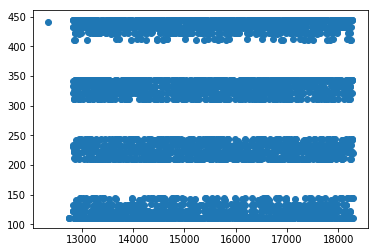

In [170]:
plt.scatter(df5['CustomerID'],df5['RFMScore'])

In [171]:
#Using kmeans of sklearn

In [173]:
from sklearn.cluster import KMeans

# Number of clusters
kmeans = KMeans(n_clusters=3)
# Fitting the input data
kmeans = kmeans.fit(df5)
# Getting the cluster labels
labels = kmeans.predict(df5)


In [174]:
import matplotlib.pyplot as plt
%matplotlib inline

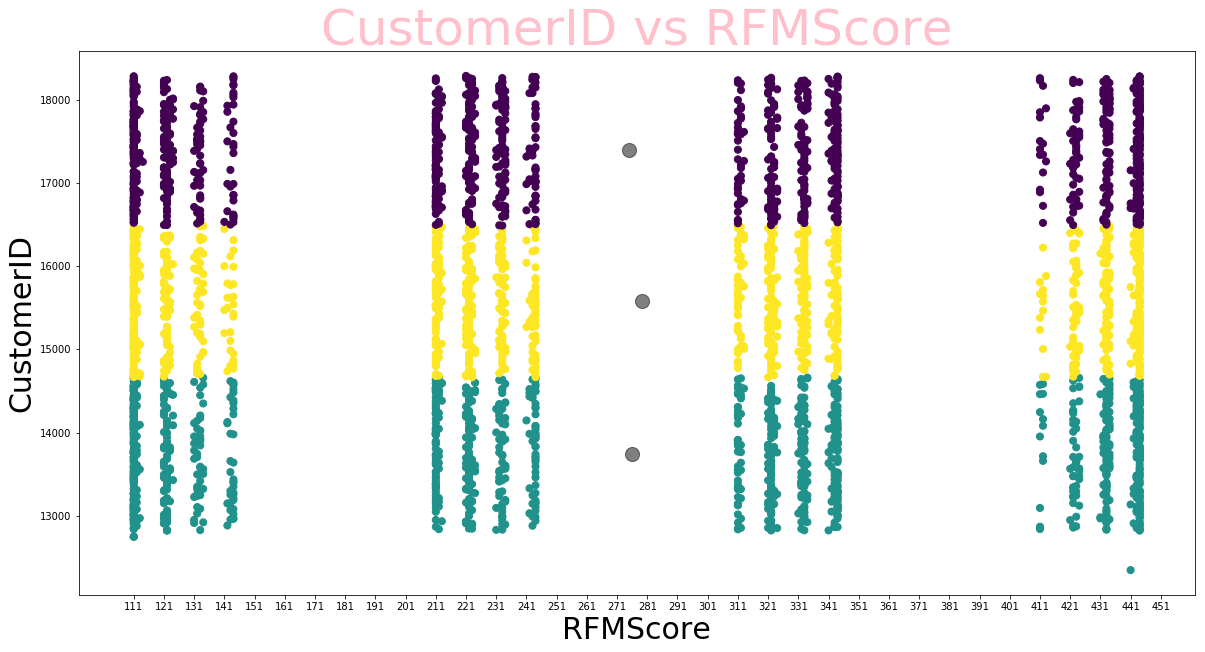

In [181]:
import numpy as np
plt.figure(figsize=(20,10))
plt.title("CustomerID vs RFMScore",fontsize=50,color="Pink")
plt.xlabel("RFMScore",fontsize=30)
plt.ylabel("CustomerID",fontsize=30)
plt.xticks(np.arange(min(df5['RFMScore']), max(df5['RFMScore'])+10, 10))
plt.scatter(df5.iloc[:, 0], df5.iloc[:, 1], c=labels, s=50, cmap='viridis')
# Centroid values
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

#This plot shows customerID vs RFMScore

In [ ]:
#By visualizing this we can easily segment customer as we know best suited customer will have 111 RFMScore or 121 or 122 or 211
#All three Places should be close to 1.